# Deteksi SMS SPAM

Dibuat oleh : Muhamamd Al-farisy

---

## Data Preparation & Wrangling

In [1]:
# Library membaca data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Variabel untuk membaca data
df = pd.read_csv('spam.csv',encoding='ISO 8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Penjelasan kolom rename** : Dari data di atas dapat dilihat kolom v1 adalah kolom yang berisikan informasi tentang keterangan spam atau tidak spam (ham). Pada kolom V2 berisikan isi pesan yang masuk. Untuk memudahakan menganalisa data v1 dan v2, disini kolomnya akan di ubah dengan keterangan baru yaitu v1 : label dan v2 : sms.

In [3]:
# Mengubah nama kolom
df.rename(columns={'v1':'label', 'v2':'sms'}, inplace = True)

In [4]:
# Melakukan pengecekan terhadap kolom yang sudah di rubah
df.iloc[[1],[0,1]]

,label,sms
1,ham,Ok lar... Joking wif u oni...


In [5]:
(df.isna().sum()/len(df)).round(2)

label         0.00
sms           0.00
Unnamed: 2    0.99
Unnamed: 3    1.00
Unnamed: 4    1.00
dtype: float64

**Penjelasan kolom unnamed** : kolom unname:2, unnamed:3, unnamed:4 di hapus karena berisikan total 100% missing values, sehingga kolom unname 2 sampai 4 ini di hapus semua dan kolom yang akan di gunakan adalah kolom label dan kolom sms.

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

# Machine Learning

### Training & Testing Dataset

In [7]:
# Melakukan import libarry untuk fuction  linear logistic
from sklearn.preprocessing import LabelBinarizer

**Penjelasan membuat variabel** : Pada case ini variabel di bagi menjadi dua, yaitu variabel x dan variabel y. Untuk variabel x berisikan informasi data/isi pesan sms yang di terima, sedangkan variabel y berisikan label 'ham atau spam' dan variabel ini menjadi target untuk analisa.

In [8]:
x = df['sms'].values
y = df['label'].values

In [9]:
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)

In [12]:
print(x_train,'\n')
print(y_train)

['Fine. Do you remember me.'
 "Good morning. At the repair shop--the ONLY reason i'm up at this hour."
 'We have pizza if u want' ...
 "I was at bugis juz now wat... But now i'm walking home oredi... ÌÏ so late then reply... I oso saw a top dat i like but din buy... Where r Ì_ now? "
 ":-) yeah! Lol. Luckily i didn't have a starring role like you!"
 'How dare you stupid. I wont tell anything to you. Hear after i wont talk to you:-.'] 

[0 0 0 ... 0 0 0]


## Feature Extraction dengan TF-IDF

In [13]:
from numpy import vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(stop_words='english')

x_train_tfidf = vectorize.fit_transform(x_train)
x_test_tfidf = vectorize.transform(x_test)

print(x_train_tfidf)

  (0, 5598)	0.737687141503897
  (0, 2817)	0.6751427117727108
  (1, 3463)	0.39714822522992826
  (1, 5524)	0.44663539458050133
  (1, 6009)	0.4139405617372063
  (1, 5619)	0.535363642146212
  (1, 4518)	0.3346797795882835
  (1, 3134)	0.26984910349305347
  (2, 7248)	0.5208021180988985
  (2, 5139)	0.853677429585497
  (3, 4028)	0.705453459816366
  (3, 2819)	0.7087562458512227
  (4, 5501)	0.5136619287776027
  (4, 6780)	0.35519379284133634
  (4, 7268)	0.41155526467427817
  (4, 1014)	0.547432173744216
  (4, 3423)	0.37540521003314015
  (5, 6849)	0.5432424008908343
  (5, 7437)	0.581404452527506
  (5, 3815)	0.6056868468569818
  (6, 6727)	0.37847134859030457
  (6, 3382)	0.5429874614734017
  (6, 3878)	0.519724577989851
  (6, 2380)	0.3557593652463534
  (6, 6746)	0.4065042337438693
  :	:
  (4733, 2154)	0.24502033657816863
  (4733, 3962)	0.2313306936634062
  (4733, 4913)	0.26554314863053813
  (4733, 4900)	0.281503459931503
  (4733, 1545)	0.22969626166723717
  (4733, 5626)	0.19662114325044242
  (4733, 760

## Binary Klasifikasi dengan Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train_tfidf,y_train)

LogisticRegression()

In [17]:
y_prediksi = model.predict(x_test_tfidf)

In [18]:
for pred,sms in zip(y_prediksi[:5],x_test[:5]):
    print(f'PREDL {pred} - SMS: {sms}\n')

PREDL 0 - SMS: Aight should I just plan to come up later tonight?

PREDL 0 - SMS: Was the farm open?

PREDL 0 - SMS: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones

PREDL 0 - SMS: Was gr8 to see that message. So when r u leaving? Congrats dear. What school and wat r ur plans.

PREDL 0 - SMS: In that case I guess I'll see you at campus lodge



## Evaluasi Metrik pada binary clasifikasi

- Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
matrix = confusion_matrix(y_test,y_prediksi)
matrix

array([[707,   1],
       [ 33,  95]], dtype=int64)

In [21]:
tn,fp,fn,tp = matrix.ravel()
print(f'TN:{tn}')
print(f'TN:{fp}')
print(f'TN:{fn}')
print(f'TN:{tp}')

TN:707
TN:1
TN:33
TN:95


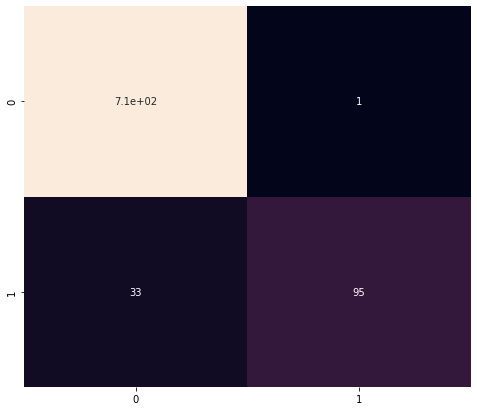

In [35]:
plt.figure(figsize=(8,7))
sns.heatmap(matrix, annot=True, cbar=False)
plt.show()

- kolom x0,y0 = true negatif. ini dikatakan negatif karena ham, bukan spam ini benar.
- kolom x1,y0 = false negaatif spam, prediksinya true positif/benar. faktanya data spam, hasil prediksi ham. 
- kolom x0,y1 = false positif, prediksi data ham, prediksinya spaam
- kolom x1,y1 = true positif, prediksi benar ini spam

Import library untuk evaluasi matrix :

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

---

### Test :

Accurasi :

In [53]:
skor_akurasi = accuracy_score(y_test,y_prediksi)
skor_akurasi

0.9593301435406698

Precission :

In [54]:
skor_precision = precision_score(y_test,y_prediksi)
skor_precision

0.9895833333333334

Recall :

In [56]:
skor_recall = recall_score(y_test,y_prediksi)
skor_recall

0.7421875

F1 score :

In [57]:
skor_f1 = f1_score(y_test,y_prediksi)
skor_f1

0.8482142857142857

In [62]:
df_evaluasi_matrix={
    'Akurasi_Test':[skor_akurasi],
    'Precision_Test':[skor_precision],
    'Recall_Test':[skor_recall],
    'F1_Test':[skor_f1]
} 
df_evaluasi_matrix_print=pd.DataFrame(df_evaluasi_matrix,index=['Akurasi_Test','Precision_Test','Recall_Test','F1_Test']).round(2)
df_evaluasi_matrix_print.T

,Akurasi_Test,Precision_Test,Recall_Test,F1_Test
Akurasi_Test,0.96,0.96,0.96,0.96
Precision_Test,0.99,0.99,0.99,0.99
Recall_Test,0.74,0.74,0.74,0.74
F1_Test,0.85,0.85,0.85,0.85


---